# Knowledge Representation And Reasoning Project on T20 Ontology based Analytics

## Group Members

Aarib Ahmed Vahidy 22K-4004 BAI-5B

Arham Hussain Khan 22K-4080 BAI-5B

Partham Kumar Chawla 22K-4079 BAI-5B


In [1]:
!pip install rdflib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 562.4/562.4 kB 8.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdflib import Graph
from rdflib.namespace import XSD
from rdflib import URIRef, Literal, Namespace, OWL, RDF

## Exploring the data

In [3]:
innings1_df = pd.read_csv('/content/1st Innings T20.csv')

In [4]:
innings1_df.head()

,Unnamed: 0,matchId,balls,runs,tossWinner,battingTeam,bowlingTeam,player_out,city,venue
0,0,5_1,0.1,0.0,India,West Indies,India,0.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
1,1,5_1,0.2,0.0,India,West Indies,India,1.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
2,2,5_1,0.3,0.0,India,West Indies,India,0.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
3,3,5_1,0.4,1.0,India,West Indies,India,0.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
4,4,5_1,0.5,0.0,India,West Indies,India,0.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground


In [5]:
innings1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13115 entries, 0 to 13114
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13115 non-null  int64  
 1   matchId      13115 non-null  object 
 2   balls        13114 non-null  float64
 3   runs         13114 non-null  float64
 4   tossWinner   12411 non-null  object 
 5   battingTeam  13114 non-null  object 
 6   bowlingTeam  13114 non-null  object 
 7   player_out   13114 non-null  float64
 8   city         13114 non-null  object 
 9   venue        13114 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.0+ MB


In [6]:
innings1_df.describe()

,Unnamed: 0,balls,runs,player_out
count,13115.000000,13114.000000,13114.000000,13114.000000
mean,60.555776,9.710251,1.281760,0.053912
std,35.653996,5.749040,1.561029,0.225852
min,0.000000,0.100000,0.000000,0.000000
25%,30.000000,4.600000,0.000000,0.000000
50%,60.000000,9.500000,1.000000,0.000000
75%,91.000000,14.500000,1.000000,0.000000
max,131.000000,19.800000,7.000000,1.000000


In [7]:
innings1_df.shape

(13115, 10)

In [8]:
#Checking for empty records
print(f"The empty records are {np.where(pd.isnull(innings1_df))}")
#Checking for categorical features
print(f"Categorical data is {innings1_df.select_dtypes(include=['object']).columns.tolist()} ")
#Checking for duplicate values
print(f"Are there any duplicate values? {innings1_df.duplicated().any()}")

The empty records are (array([ 1988,  1989,  1990,  1991,  1992,  1993,  1994,  1995,  1996,
        1997,  1998,  1999,  2000,  2001,  2002,  2003,  2004,  2005,
        2006,  2007,  2008,  2009,  2010,  2011,  2012,  2013,  2014,
        2015,  2016,  2017,  2018,  2019,  2020,  2021,  2022,  2023,
        2024,  2025,  2026,  2027,  2028,  2029,  2030,  2031,  2032,
        2033,  2034,  2035,  2036,  2037,  2038,  2039,  2040,  2041,
        2042,  2043,  2044,  2045,  2046,  2047,  2048,  2049,  2050,
        2051,  2052,  2053,  2054,  2055,  2056,  2057,  2058,  2059,
        2060,  2061,  2062,  2063,  2064,  2065,  2066,  2067,  2068,
        2069,  2070,  2071,  2072,  2073,  2074,  2075,  5044,  5045,
        5046,  5047,  5048,  5049,  5050,  5051,  5052,  5053,  5054,
        5055,  5056,  5057,  5058,  5059,  5060,  5061,  5062,  5063,
        5064,  5065,  5066,  5067,  5068,  5069,  5070,  5071,  5072,
        5073,  5074,  5075,  5076,  5077,  5078,  5079,  5080,  508

In [9]:
print(innings1_df['tossWinner'].value_counts(dropna=False))  #Inspecting unique values

tossWinner
Pakistan        2215
Australia       1735
India           1576
England         1568
South Africa    1225
Sri Lanka        989
New Zealand      729
NaN              704
Afghanistan      619
West Indies      510
Ireland          496
Bangladesh       255
Netherlands      248
Zimbabwe         246
Name: count, dtype: int64


It appears that we have null values in the tosswinner column as shown by .info and .value_counts, they will need to be dealt with by dropping them.

In [10]:
innings1_df_cleaned = innings1_df.dropna()

In [11]:
print(innings1_df_cleaned.info())
print(innings1_df_cleaned.isnull().sum())#Verifying no nulls remain

<class 'pandas.core.frame.DataFrame'>
Index: 12411 entries, 0 to 13113
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   12411 non-null  int64  
 1   matchId      12411 non-null  object 
 2   balls        12411 non-null  float64
 3   runs         12411 non-null  float64
 4   tossWinner   12411 non-null  object 
 5   battingTeam  12411 non-null  object 
 6   bowlingTeam  12411 non-null  object 
 7   player_out   12411 non-null  float64
 8   city         12411 non-null  object 
 9   venue        12411 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.0+ MB
None
Unnamed: 0     0
matchId        0
balls          0
runs           0
tossWinner     0
battingTeam    0
bowlingTeam    0
player_out     0
city           0
venue          0
dtype: int64


### Repeating steps for innings 2

In [12]:
innings2_df = pd.read_csv('/content/2nd Innings T20.csv')

In [13]:
innings2_df.head()

,Unnamed: 0,matchId,balls,runs,tossWinner,battingTeam,bowlingTeam,player_out,city,venue
0,0,5_2,0.1,0,India,India,West Indies,0.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
1,1,5_2,0.2,0,India,India,West Indies,0.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
2,2,5_2,0.3,1,India,India,West Indies,0.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
3,3,5_2,0.4,1,India,India,West Indies,0.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
4,4,5_2,0.5,0,India,India,West Indies,0.0,Lauderhill,Central Broward Regional Park Stadium Turf Ground


In [14]:
innings2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13067 entries, 0 to 13066
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   13067 non-null  int64  
 1   matchId      13067 non-null  object 
 2   balls        13067 non-null  float64
 3   runs         13067 non-null  int64  
 4   tossWinner   12719 non-null  object 
 5   battingTeam  13067 non-null  object 
 6   bowlingTeam  13067 non-null  object 
 7   player_out   13066 non-null  float64
 8   city         13066 non-null  object 
 9   venue        13066 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1021.0+ KB


In [15]:
innings2_df.describe()

,Unnamed: 0,balls,runs,player_out
count,13067.000000,13067.000000,13067.000000,13066.000000
mean,56.317058,9.005809,1.241907,0.055564
std,33.999441,5.486113,1.563893,0.229087
min,0.000000,0.100000,0.000000,0.000000
25%,27.000000,4.300000,0.000000,0.000000
50%,55.000000,8.600000,1.000000,0.000000
75%,84.000000,13.500000,1.000000,0.000000
max,129.000000,19.800000,7.000000,1.000000


In [16]:
innings2_df.shape

(13067, 10)

In [17]:
#Checking for empty records
print(f"The empty records are {np.where(pd.isnull(innings2_df))}")
#Checking for categorical features
print(f"Categorical data is {innings2_df.select_dtypes(include=['object']).columns.tolist()} ")
#Checking for duplicate values
print(f"Are there any duplicate values? {innings2_df.duplicated().any()}")

The empty records are (array([ 1737,  1738,  1739,  1740,  1741,  1742,  1743,  1744,  1745,
        1746,  1747,  1748,  4436,  4437,  4438,  4439,  4440,  4441,
        4442,  4443,  4444,  4445,  4446,  4447,  4448,  4449,  4450,
        4451,  4452,  4453,  4454,  4455,  4456,  4457,  4458,  4459,
        4460,  4461,  4462,  4463,  4464,  4465,  4466,  4467,  4468,
        4469,  4470,  4471,  4472,  4473,  4474,  4475,  4476,  4477,
        4478,  4479,  4480,  4481,  4482,  4483,  4484,  4485,  4486,
        4487,  4488,  4489,  4490,  4491,  4492,  4493,  4494,  4495,
        4496,  4497,  4498,  4499,  4500,  4501,  4502,  4503,  4504,
        4505,  4506,  4507,  4508,  5250,  5251,  5252,  5253,  5254,
        5255,  5256,  5257,  5258,  5259,  5260,  5261,  5262,  5263,
        5264,  5265,  5266,  5267,  5268,  5269,  5270,  5271,  5272,
        5273,  5274,  5275,  5276,  5277,  5278,  5279,  5280,  5281,
        5282,  5283,  5284,  5285,  5286,  5287,  5288,  5289,  529

In [18]:
print(innings2_df['tossWinner'].value_counts(dropna=False))  #Inspecting unique values

tossWinner
Pakistan        2065
England         1833
India           1763
Australia       1598
South Africa    1123
Sri Lanka       1084
New Zealand      674
Afghanistan      562
West Indies      476
Netherlands      475
Ireland          458
Bangladesh       364
NaN              348
Zimbabwe         244
Name: count, dtype: int64


In [19]:
innings2_df_cleaned = innings2_df.dropna()

In [20]:
print(innings2_df_cleaned.info())
print(innings2_df_cleaned.isnull().sum())#Verifying no nulls remain

<class 'pandas.core.frame.DataFrame'>
Index: 12718 entries, 0 to 13065
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   12718 non-null  int64  
 1   matchId      12718 non-null  object 
 2   balls        12718 non-null  float64
 3   runs         12718 non-null  int64  
 4   tossWinner   12718 non-null  object 
 5   battingTeam  12718 non-null  object 
 6   bowlingTeam  12718 non-null  object 
 7   player_out   12718 non-null  float64
 8   city         12718 non-null  object 
 9   venue        12718 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.1+ MB
None
Unnamed: 0     0
matchId        0
balls          0
runs           0
tossWinner     0
battingTeam    0
bowlingTeam    0
player_out     0
city           0
venue          0
dtype: int64


## Plotting the data to understand it better

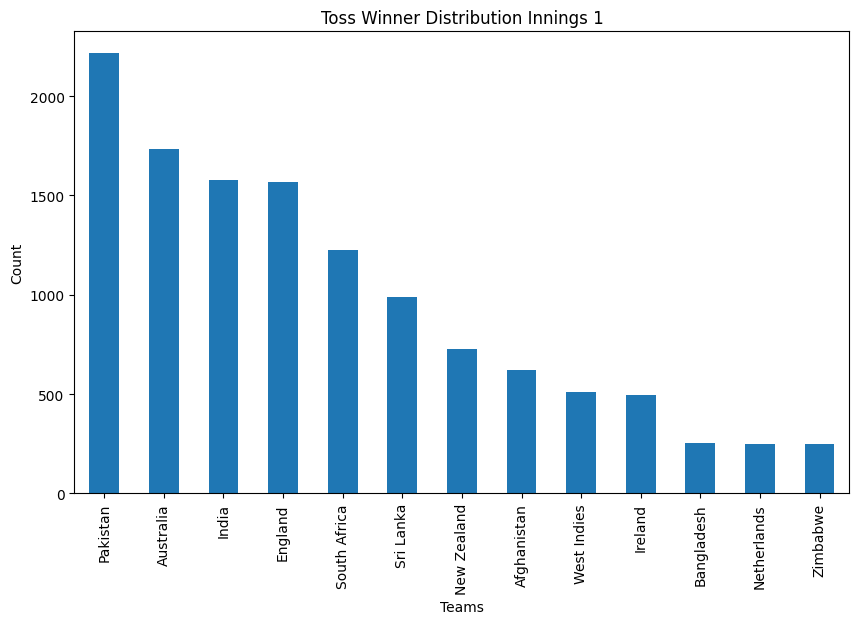

In [21]:
innings1_df_cleaned['tossWinner'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title("Toss Winner Distribution Innings 1")
plt.ylabel("Count")
plt.xlabel("Teams")
plt.show()

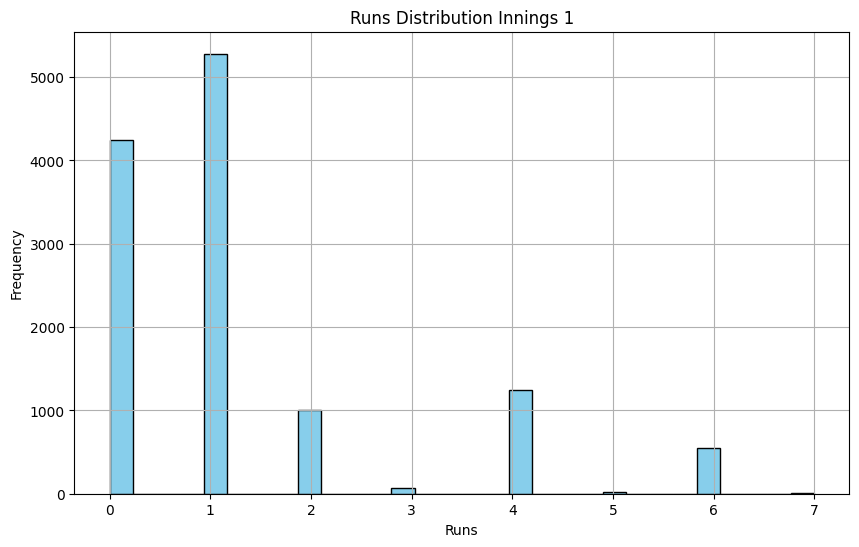

In [22]:
innings1_df_cleaned['runs'].hist(bins=30, color='skyblue', edgecolor='black', figsize=(10, 6))
plt.title("Runs Distribution Innings 1")
plt.xlabel("Runs")
plt.ylabel("Frequency")
plt.show()

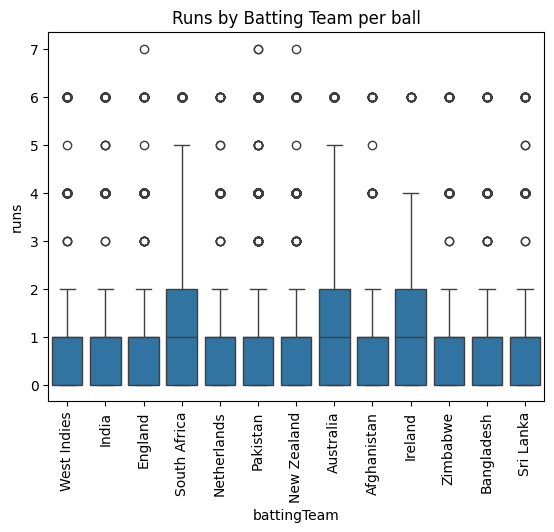

In [23]:
sns.boxplot(data=innings1_df_cleaned, x='battingTeam', y='runs')
plt.xticks(rotation=90)
plt.title("Runs by Batting Team per ball")
plt.show()

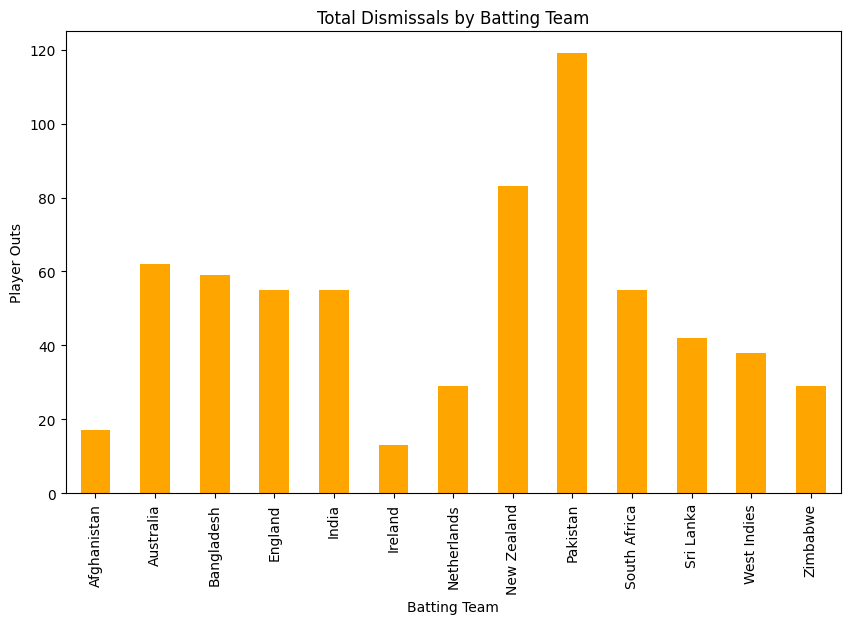

In [24]:
innings1_df_cleaned.groupby('battingTeam')['player_out'].sum().plot(kind='bar', figsize=(10, 6), color='orange')
plt.title("Total Dismissals by Batting Team")
plt.ylabel("Player Outs")
plt.xlabel("Batting Team")
plt.show()

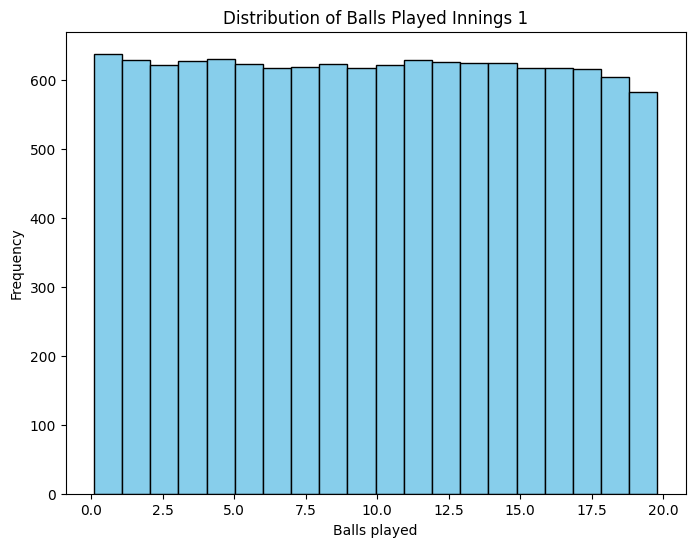

In [25]:
plt.figure(figsize = (8, 6))
plt.hist(innings1_df_cleaned['balls'], bins = 20, color = 'skyblue', edgecolor = 'black')
plt.title("Distribution of Balls Played Innings 1")
plt.xlabel("Balls played")
plt.ylabel("Frequency")
plt.show()

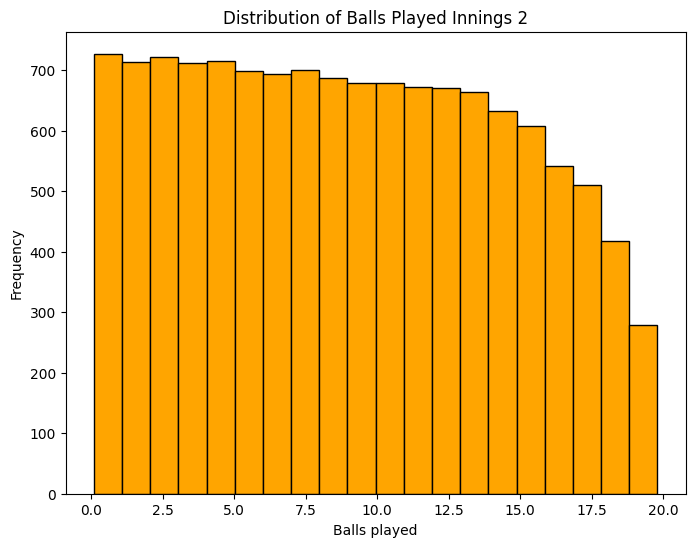

In [26]:
plt.figure(figsize = (8, 6))
plt.hist(innings2_df_cleaned['balls'], bins = 20, color = 'orange', edgecolor = 'black')
plt.title("Distribution of Balls Played Innings 2")
plt.xlabel("Balls played")
plt.ylabel("Frequency")
plt.show()

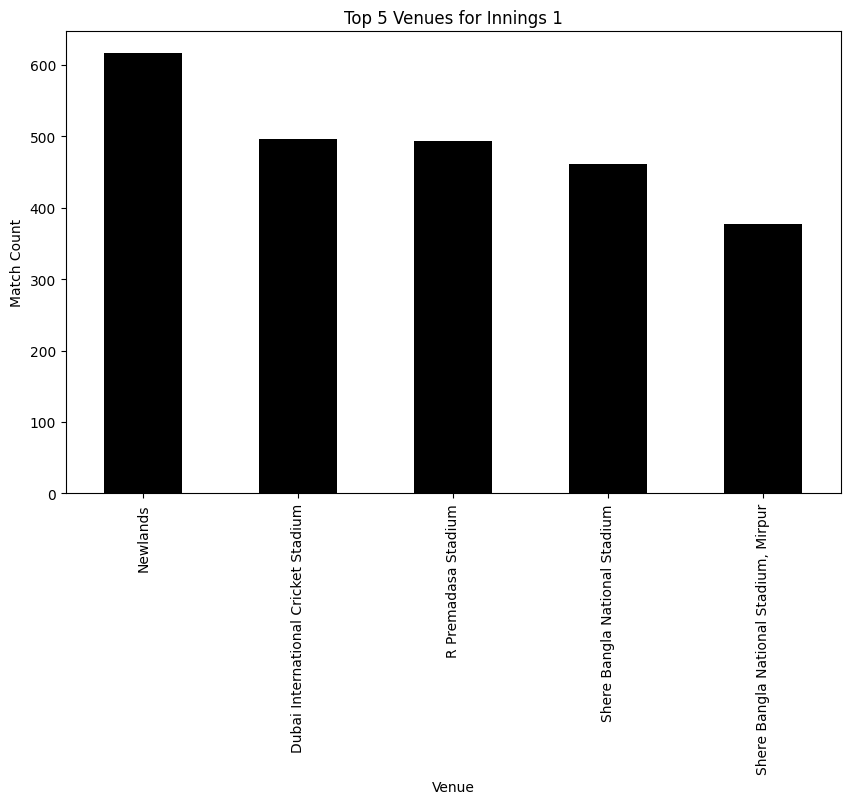

In [27]:
# Checking match venues
venue_counts = innings1_df_cleaned['venue'].value_counts().head(5)
venue_counts.plot(kind = 'bar', color = 'black', figsize = (10, 6))
plt.title("Top 5 Venues for Innings 1")
plt.xlabel("Venue")
plt.ylabel("Match Count")
plt.show()

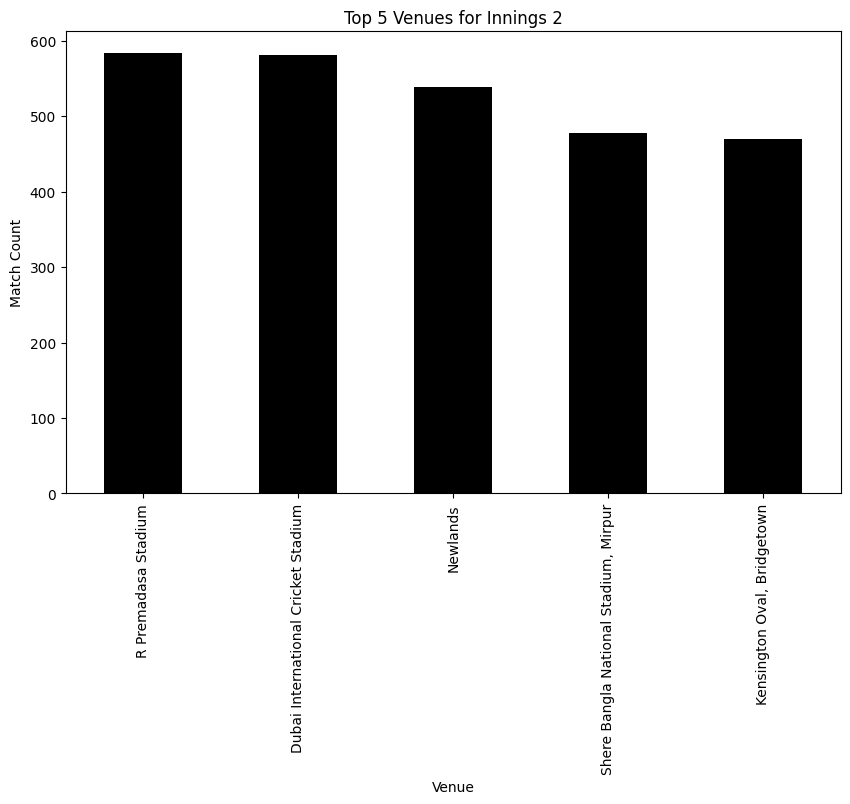

In [28]:
# Checking match venues
venue_counts = innings2_df_cleaned['venue'].value_counts().head(5)
venue_counts.plot(kind = 'bar', color = 'black', figsize = (10, 6))
plt.title("Top 5 Venues for Innings 2")
plt.xlabel("Venue")
plt.ylabel("Match Count")
plt.show()

In [29]:
innings1_df_cleaned.columns

Index(['Unnamed: 0', 'matchId', 'balls', 'runs', 'tossWinner', 'battingTeam',
       'bowlingTeam', 'player_out', 'city', 'venue'],
      dtype='object')

In [30]:
innings1_df = innings1_df_cleaned.drop('Unnamed: 0', axis = 1)
innings2_df = innings2_df_cleaned.drop('Unnamed: 0', axis = 1)
#Unnamed : 0 is an irrelevant column so dropped it

In [31]:
innings1_df['runs'] = innings1_df['runs'].astype(int)
innings1_df['player_out'] = innings1_df['player_out'].astype(int)

innings2_df['runs'] = innings2_df['runs'].astype(int)
innings2_df['player_out'] = innings2_df['player_out'].astype(int)

In [32]:
innings1_df.head(15)

,matchId,balls,runs,tossWinner,battingTeam,bowlingTeam,player_out,city,venue
0,5_1,0.1,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
1,5_1,0.2,0,India,West Indies,India,1,Lauderhill,Central Broward Regional Park Stadium Turf Ground
2,5_1,0.3,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
3,5_1,0.4,1,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
4,5_1,0.5,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
5,5_1,0.6,5,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
6,5_1,0.7,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
7,5_1,1.1,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
8,5_1,1.2,1,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground
9,5_1,1.3,0,India,West Indies,India,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground


In [33]:
innings1_df.shape

(12411, 9)

In [35]:
import time
from rdflib import Graph

start_time = time.time()

rdf_file = "/content/T20.rdf"
g = Graph()
g.parse(rdf_file, format="xml")

end_time = time.time()

total_time = end_time - start_time

print(f"Graph loaded with {len(g)} triples.")
print(f"Time taken to load the RDF file: {total_time:.2f} seconds")


Graph loaded with 1923410 triples.
Time taken to load the RDF file: 247.99 seconds


The given RDF is very large and needs significant computational power for any sort of queries.

So we have decided to create our own RDF using the given dataframes in order to improve computational time and have greater control over the structure of the RDF.

## Creating RDF File

In [36]:
#Creating namespace for my ontology
onto = Namespace("http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#")

g = Graph()

g.bind("owl", OWL)
g.bind("xsd", XSD)

g.bind("onto", onto)

def create_rdf_triples(dataframe, innings):
  for index, row in dataframe.iterrows():
    match_id = row['matchId']
    balls = row['balls']
    runs = row['runs']
    batting_team = row['battingTeam']
    toss_winner = row['tossWinner']
    bowling_team = row['bowlingTeam']
    player_dismissed = row['player_out']
    city = row['city']
    venue = row['venue']

    match_uri = onto[f"match_{innings}_{match_id}"] #Dynamically generating URI's
    inning_uri = onto[f"inning_{innings}"]

    #Adding triples to the graph
    g.add((match_uri, RDF.type, inning_uri)) #Makes match a specific type of inning
    g.add((match_uri, onto.hasID, Literal(match_id)))
    g.add((match_uri, onto.hasBall, Literal(balls, datatype=XSD.float)))
    g.add((match_uri, onto.hasRuns, Literal(runs, datatype=XSD.int))) #Defining types as RDF doesn't inherently know if float or int
    g.add((match_uri, onto.hasBattingTeam, Literal(batting_team))) #Strings dont need to be defined explicitly knwon
    g.add((match_uri, onto.hasTossWinner, Literal(toss_winner)))
    g.add((match_uri, onto.hasBowlingTeam, Literal(bowling_team)))
    g.add((match_uri, onto.hasPlayerDismissed, Literal(player_dismissed, datatype = XSD.int)))
    g.add((match_uri, onto.hasCity, Literal(city)))
    g.add((match_uri, onto.hasVenue, Literal(venue)))

In [37]:
create_rdf_triples(innings1_df, "1st")
create_rdf_triples(innings2_df, "2nd")

In [38]:
g.serialize(destination="Aarib_t20_cricket_ontology.rdf", format="xml")

<Graph identifier=N55d365ce6e8f488f95c1e477de06276e (<class 'rdflib.graph.Graph'>)>

In [39]:
print(f"The total number of triples in the graph I have created myself are {len(g)}")

The total number of triples in the graph I have created myself are 28279


## Checking classes, relations and instances in the graph

In [40]:
#query to get distinct classes from the RDF graph
class_query = """
  SELECT DISTINCT ?class
  WHERE {
    ?subject a ?class
  }
"""

classes = g.query(class_query)

print("Distinct Classes:")
for class_uri, in classes:
    print(class_uri)

Distinct Classes:
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#inning_1st
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#inning_2nd


In [41]:
#Query to get distinct relations/properties from the RDF graph
relation_query = """
  SELECT DISTINCT ?relation
  WHERE {
    ?subject ?relation ?object
  }
"""

relations = g.query(relation_query)

print("Distinct Relations (Predicates):")
for relation_uri, in relations:
    print(relation_uri)


Distinct Relations (Predicates):
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#hasBall
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#hasRuns
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#hasPlayerDismissed
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#hasID
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#hasBowlingTeam
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#hasCity
http://www.w3.org/1999/02/22-rdf-syntax-ns#type
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#hasVenue
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#hasTossWinner
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#hasBattingTeam


In [42]:
#Query to get instances from the graph
instances_query = """
SELECT DISTINCT ?instance
WHERE {
  ?instance a ?class .
}
"""

instances = g.query(instances_query)

print("Instances:")
for instance_uri, in instances:
    print(instance_uri)

Instances:
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_5_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_7_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_9_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_10_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_11_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_13_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_19_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_24_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_25_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_32_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_34_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_35_1
http://www.semanticweb.org/aarib/ontologies/2024/t20-cricket#match_1st_39_1
http

## Querrying the RDF

### Total runs scored by each batting team across all matches

In [43]:
query_top_run_scorers = """
    SELECT ?batting_team (SUM(xsd:integer(?runs)) AS ?totalRuns)
    WHERE {
        ?match onto:hasRuns ?runs .
        ?match onto:hasBattingTeam ?batting_team .
    }
    GROUP BY ?batting_team
    ORDER BY DESC(?totalRuns)
"""

# Execute the query
result = g.query(query_top_run_scorers)

# Print the results
for row in result:
    print(f"Batting Team: {row['batting_team']}, Total Runs: {row['totalRuns']}")

Batting Team: Pakistan, Total Runs: 456
Batting Team: Australia, Total Runs: 389
Batting Team: England, Total Runs: 358
Batting Team: India, Total Runs: 317
Batting Team: South Africa, Total Runs: 257
Batting Team: Sri Lanka, Total Runs: 257
Batting Team: New Zealand, Total Runs: 253
Batting Team: West Indies, Total Runs: 237
Batting Team: Bangladesh, Total Runs: 221
Batting Team: Zimbabwe, Total Runs: 161
Batting Team: Netherlands, Total Runs: 133
Batting Team: Afghanistan, Total Runs: 122
Batting Team: Ireland, Total Runs: 113


Could be used in various analytical contexts, such as identifying strong teams in T20 cricket or comparing historical performance.

### Finding match winners
based on match_id for example match_id 5_1 represents innings 1 of match 5 and match_id 5_2 represents innings 2 of match 5 according to the dataframes given.

In [44]:
query = """
SELECT ?match ?id
WHERE {
  ?match onto:hasID ?id.
}
LIMIT 10
"""
result = g.query(query)
for row in result:
    print(f"Match ID: {row['id']}")

Match ID: 5_1
Match ID: 7_1
Match ID: 9_1
Match ID: 10_1
Match ID: 11_1
Match ID: 13_1
Match ID: 19_1
Match ID: 24_1
Match ID: 25_1
Match ID: 32_1


In [45]:
winner_query = """
SELECT
  (?battingTeam AS ?firstInningBattingTeam)
  (SUM(xsd:integer(?runs)) AS ?firstInningScore)
  (?bowlingTeam AS ?secondInningBattingTeam)
  (SUM(xsd:integer(?runs2)) AS ?secondInningScore)
  (IF(SUM(xsd:integer(?runs)) > SUM(xsd:integer(?runs2)), ?battingTeam, ?bowlingTeam) AS ?winner)
WHERE {
  # First inning
  ?match onto:hasRuns ?runs.
  ?match onto:hasBattingTeam ?battingTeam.
  ?match onto:hasBowlingTeam ?bowlingTeam.
  ?match onto:hasID ?matchID1.
  FILTER(?matchID1 = "5_1").

  # Second inning
  ?match2 onto:hasRuns ?runs2.
  ?match2 onto:hasBattingTeam ?battingTeam2.
  ?match2 onto:hasBowlingTeam ?bowlingTeam2.
  ?match2 onto:hasID ?matchID2.
  FILTER(?matchID2 = "5_2").
}
GROUP BY ?battingTeam ?bowlingTeam
"""

# Execute the query
results = g.query(winner_query)

# Process and print the results
for row in results:
    print(f"First Inning Batting Team: {row.firstInningBattingTeam}")
    print(f"First Inning Score: {row.firstInningScore}")
    print(f"Second Inning Batting Team: {row.secondInningBattingTeam}")
    print(f"Second Inning Score: {row.secondInningScore}")
    print(f"Winner: {row.winner}")

First Inning Batting Team: West Indies
First Inning Score: 108
Second Inning Batting Team: India
Second Inning Score: 96
Winner: West Indies


Due to the complexity of the query it took 4 minutes 35 seconds to run. But gave the correct output which was as follows

First Inning Batting Team: West Indies

First Inning Score: 108

Second Inning Batting Team: India

Second Inning Score: 96

Winner: West Indies

Logic:- Whichever team has the higher score is the winner.

### Finding the most popular venues for matches

In [46]:
query_popular_venues = """
SELECT ?venue (COUNT(?match) AS ?matches_played)
WHERE {
  ?match onto:hasVenue ?venue.
}
GROUP BY ?venue
ORDER BY DESC(?matches_played)
LIMIT 5
"""
results = g.query(query_popular_venues)

for row in results:
    print(f"Venue: {row['venue']}, Matches Played: {row['matches_played']}")


Venue: Newlands, Matches Played: 10
Venue: Dubai International Cricket Stadium, Matches Played: 9
Venue: R Premadasa Stadium, Matches Played: 9
Venue: Shere Bangla National Stadium, Matches Played: 8
Venue: Shere Bangla National Stadium, Mirpur, Matches Played: 7


### Matches played per city

In [47]:
query_matches_per_city = """
SELECT ?city (COUNT(?match) AS ?matches_played)
WHERE {
  ?match onto:hasCity ?city.
}
GROUP BY ?city
ORDER BY DESC(?matches_played)
LIMIT 5
"""

result = g.query(query_matches_per_city)

for row in result:
    print(f"City: {row['city']}, Matches Played: {row['matches_played']}")

City: Colombo, Matches Played: 11
City: Cape Town, Matches Played: 10
City: Johannesburg, Matches Played: 10
City: Dubai, Matches Played: 9
City: Dhaka, Matches Played: 9


###Most wickets taken in an over

In [48]:
query_most_wickets_in_over = """
SELECT ?over ?matchID ?battingTeam ?bowlingTeam (SUM(DISTINCT xsd:integer(?playerOut)) AS ?wicketsInOver)
WHERE {
  ?match onto:hasID ?matchID.
  ?match onto:hasRuns ?runs.
  ?match onto:hasBattingTeam ?battingTeam.
  ?match onto:hasBall ?balls.
  ?match onto:hasBowlingTeam ?bowlingTeam.
  ?match onto:hasPlayerDismissed ?playerOut.

  #Extracting the over number from the 'balls' field
  BIND(STRBEFORE(STR(?balls), ".") AS ?over)
}
GROUP BY ?over ?matchID ?battingTeam ?bowlingTeam
ORDER BY DESC(?wicketsInOver)
LIMIT 10
"""

result = g.query(query_most_wickets_in_over)
for row in result:
    print(f"Over: {row['over']}, Match ID: {row['matchID']}, Batting Team: {row['battingTeam']}, Bowling Team: {row['bowlingTeam']}, Wickets in Over: {row['wicketsInOver']}")


Over: 0, Match ID: 5_1, Batting Team: West Indies, Bowling Team: India, Wickets in Over: 1
Over: 0, Match ID: 7_1, Batting Team: West Indies, Bowling Team: Australia, Wickets in Over: 1
Over: 0, Match ID: 9_1, Batting Team: India, Bowling Team: England, Wickets in Over: 1
Over: 0, Match ID: 10_1, Batting Team: England, Bowling Team: South Africa, Wickets in Over: 1
Over: 0, Match ID: 11_1, Batting Team: South Africa, Bowling Team: England, Wickets in Over: 1
Over: 0, Match ID: 13_1, Batting Team: Netherlands, Bowling Team: Afghanistan, Wickets in Over: 1
Over: 0, Match ID: 19_1, Batting Team: Pakistan, Bowling Team: South Africa, Wickets in Over: 1
Over: 0, Match ID: 24_1, Batting Team: New Zealand, Bowling Team: Australia, Wickets in Over: 1
Over: 0, Match ID: 25_1, Batting Team: New Zealand, Bowling Team: Bangladesh, Wickets in Over: 1
Over: 0, Match ID: 32_1, Batting Team: Pakistan, Bowling Team: Zimbabwe, Wickets in Over: 1


### Query to find top 5 teams that have won the most tosses

In [49]:
query_top_toss_winners = """
    SELECT ?toss_winner (COUNT(?match) AS ?tossWins)
    WHERE {
        ?match onto:hasTossWinner ?toss_winner .
    }
    GROUP BY ?toss_winner
    ORDER BY DESC(?tossWins)
    LIMIT 5
"""

result = g.query(query_top_toss_winners)

for row in result:
    print(f"Toss Winner: {row['toss_winner']}, Toss Wins: {row['tossWins']}")

Toss Winner: Pakistan, Toss Wins: 36
Toss Winner: England, Toss Wins: 30
Toss Winner: India, Toss Wins: 29
Toss Winner: Australia, Toss Wins: 29
Toss Winner: South Africa, Toss Wins: 21


### Query to find 5 teams that won the least amount of tosses

In [50]:
query_least_toss_winners = """
    SELECT ?toss_winner (COUNT(?match) AS ?tossWins)
    WHERE {
        ?match onto:hasTossWinner ?toss_winner .
    }
    GROUP BY ?toss_winner
    ORDER BY ASC(?tossWins)
    LIMIT 5
"""

result = g.query(query_least_toss_winners)

for row in result:
    print(f"Toss Winner: {row['toss_winner']}, Toss Wins: {row['tossWins']}")

Toss Winner: Zimbabwe, Toss Wins: 4
Toss Winner: Bangladesh, Toss Wins: 5
Toss Winner: Netherlands, Toss Wins: 6
Toss Winner: West Indies, Toss Wins: 8
Toss Winner: Ireland, Toss Wins: 8


### Average runs per ball

In [51]:
query_avg_runs_per_ball = """
    SELECT ?batting_team (AVG(xsd:float(?runs)) AS ?avgRuns)
    WHERE {
        ?match onto:hasRuns ?runs .
        ?match onto:hasBattingTeam ?batting_team .
    }
    GROUP BY ?batting_team
    ORDER BY DESC(?avgRuns)
"""

result = g.query(query_avg_runs_per_ball)

for row in result:
    print(f"Batting Team: {row['batting_team']}, Average Runs Per Ball: {row['avgRuns']}")


Batting Team: Pakistan, Average Runs Per Ball: 2.7804878048780486
Batting Team: England, Average Runs Per Ball: 2.7751937984496124
Batting Team: Afghanistan, Average Runs Per Ball: 2.772727272727273
Batting Team: Australia, Average Runs Per Ball: 2.73943661971831
Batting Team: West Indies, Average Runs Per Ball: 2.7241379310344827
Batting Team: India, Average Runs Per Ball: 2.7094017094017095
Batting Team: South Africa, Average Runs Per Ball: 2.705263157894737
Batting Team: Sri Lanka, Average Runs Per Ball: 2.705263157894737
Batting Team: New Zealand, Average Runs Per Ball: 2.663157894736842
Batting Team: Netherlands, Average Runs Per Ball: 2.66
Batting Team: Bangladesh, Average Runs Per Ball: 2.630952380952381
Batting Team: Zimbabwe, Average Runs Per Ball: 2.5555555555555554
Batting Team: Ireland, Average Runs Per Ball: 2.511111111111111


### Teams that have played the most number of matches

In [52]:
query_most_played_teams = """
    SELECT ?batting_team (COUNT(?match) AS ?matchesPlayed)
    WHERE {
        ?match onto:hasBattingTeam ?batting_team .
    }
    GROUP BY ?batting_team
    ORDER BY DESC(?matchesPlayed)
"""

result = g.query(query_most_played_teams)
for row in result:
    print(f"Batting Team: {row['batting_team']}, Matches Played: {row['matchesPlayed']}")

Batting Team: Pakistan, Matches Played: 28
Batting Team: Australia, Matches Played: 25
Batting Team: England, Matches Played: 22
Batting Team: India, Matches Played: 21
Batting Team: South Africa, Matches Played: 17
Batting Team: New Zealand, Matches Played: 17
Batting Team: Sri Lanka, Matches Played: 17
Batting Team: West Indies, Matches Played: 16
Batting Team: Bangladesh, Matches Played: 15
Batting Team: Zimbabwe, Matches Played: 12
Batting Team: Netherlands, Matches Played: 9
Batting Team: Ireland, Matches Played: 9
Batting Team: Afghanistan, Matches Played: 8


### Most sixes scored by a team

In [53]:
query_most_sixes_by_team = """
SELECT (COUNT(xsd:integer(?runs)) AS ?TotalSixes) ?battingTeam
WHERE {
    ?match onto:hasID ?matchid .
    ?match onto:hasRuns ?runs .
    ?match onto:hasBattingTeam ?battingTeam .
    ?match onto:hasBowlingTeam ?bowlingTeam .

    FILTER (?runs = 6)
}
GROUP BY  ?battingTeam
ORDER BY DESC(?TotalSixes)
LIMIT 10
"""

result = g.query(query_most_sixes_by_team)
print("Total sixes scored by each team")
for row in result:
    print(f"Batting Team: {row['battingTeam']}, Total Sixes: {row['TotalSixes']}")

Total sixes scored by each team
Batting Team: Pakistan, Total Sixes: 28
Batting Team: Australia, Total Sixes: 24
Batting Team: India, Total Sixes: 21
Batting Team: England, Total Sixes: 21
Batting Team: South Africa, Total Sixes: 17
Batting Team: Sri Lanka, Total Sixes: 17
Batting Team: West Indies, Total Sixes: 16
Batting Team: New Zealand, Total Sixes: 15
Batting Team: Bangladesh, Total Sixes: 14
Batting Team: Zimbabwe, Total Sixes: 11


### Most fours scored by a team

In [54]:
query_most_fours_by_team = """
SELECT (COUNT(xsd:integer(?runs)) AS ?TotalFours) ?battingTeam
WHERE {
    ?match onto:hasID ?matchid .
    ?match onto:hasRuns ?runs .
    ?match onto:hasBattingTeam ?battingTeam .
    ?match onto:hasBowlingTeam ?bowlingTeam .

    FILTER (?runs = 4)
}
GROUP BY  ?battingTeam
ORDER BY DESC(?TotalFours)
LIMIT 10
"""

result = g.query(query_most_fours_by_team)
print("Total fours scored by each team")
for row in result:
    print(f"Batting Team: {row['battingTeam']}, Total Sixes: {row['TotalFours']}")

Total fours scored by each team
Batting Team: Pakistan, Total Sixes: 28
Batting Team: Australia, Total Sixes: 25
Batting Team: England, Total Sixes: 22
Batting Team: India, Total Sixes: 21
Batting Team: South Africa, Total Sixes: 17
Batting Team: New Zealand, Total Sixes: 17
Batting Team: Sri Lanka, Total Sixes: 17
Batting Team: West Indies, Total Sixes: 16
Batting Team: Bangladesh, Total Sixes: 15
Batting Team: Zimbabwe, Total Sixes: 11


### Total wickets taken by each team

In [55]:
query_total_wickets_by_team = """
SELECT ?bowlingTeam (COUNT(?playerOut) AS ?totalWickets)
WHERE {
    ?match onto:hasBowlingTeam ?bowlingTeam .
    ?match onto:hasPlayerDismissed ?playerOut .
}
GROUP BY ?bowlingTeam
ORDER BY DESC(?totalWickets)
"""

result = g.query(query_total_wickets_by_team)
print("Total wickets taken by each team:")
for row in result:
    print(f"Bowling Team: {row['bowlingTeam']}, Total Wickets: {row['totalWickets']}")


Total wickets taken by each team:
Bowling Team: Pakistan, Total Wickets: 54
Bowling Team: Australia, Total Wickets: 48
Bowling Team: India, Total Wickets: 44
Bowling Team: England, Total Wickets: 44
Bowling Team: Sri Lanka, Total Wickets: 35
Bowling Team: New Zealand, Total Wickets: 34
Bowling Team: Bangladesh, Total Wickets: 32
Bowling Team: West Indies, Total Wickets: 32
Bowling Team: South Africa, Total Wickets: 31
Bowling Team: Zimbabwe, Total Wickets: 26
Bowling Team: Ireland, Total Wickets: 20
Bowling Team: Afghanistan, Total Wickets: 16
Bowling Team: Netherlands, Total Wickets: 14


### Best bowling performance (most wickets in a match)

In [56]:
query_best_bowling_figures = """
SELECT ?matchid ?bowlingTeam (COUNT(?playerOut) AS ?totalWickets)
WHERE {
    ?match onto:hasID ?matchid .
    ?match onto:hasBowlingTeam ?bowlingTeam .
    ?match onto:hasPlayerDismissed ?playerOut .
}
GROUP BY ?matchid ?bowlingTeam
ORDER BY DESC(?totalWickets)
LIMIT 1
"""

result = g.query(query_best_bowling_figures)
print("Best bowling performance (most wickets in a match):")
for row in result:
    print(f"Match ID: {row['matchid']}, Bowling Team: {row['bowlingTeam']}, Wickets: {row['totalWickets']}")

Best bowling performance (most wickets in a match):
Match ID: 5_1, Bowling Team: India, Wickets: 2
